# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.

athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
athletes.isna().any()

id             False
name           False
nationality    False
sex            False
dob             True
height          True
weight          True
sport          False
gold           False
silver         False
bronze         False
dtype: bool

In [7]:
get_sample(athletes, 'dob')

5187     10/30/93
6260      9/17/89
2069      5/15/90
7259      1/10/88
4995      9/28/93
           ...   
3710       5/8/89
10718    10/23/83
5058      5/10/85
2709      12/6/88
1068      3/10/91
Name: dob, Length: 100, dtype: object

## Reflexão questões 1 e 2

In [8]:
#H0 amostra esta em uma distribuição normal
#Como p-value < 0.05 então rejeitamos H0 
var=get_sample(athletes, 'height', n=3000)
sct.shapiro(var)

(0.9961519837379456, 5.681722541339695e-07)

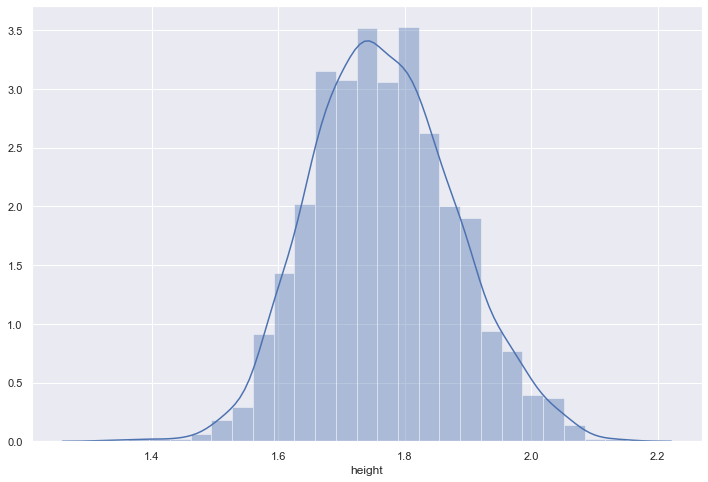

In [9]:
#a visualização é semelhante a uma distribuição normal mas 
#os testes estatisticos dizem o contrário
sns.distplot(var, bins=25)

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([1.33, 1.37, 1.38, ..., 2.11, 2.13, 2.15])),
 (0.11228392813612545, 1.7667799999999998, 0.9980655667713957))

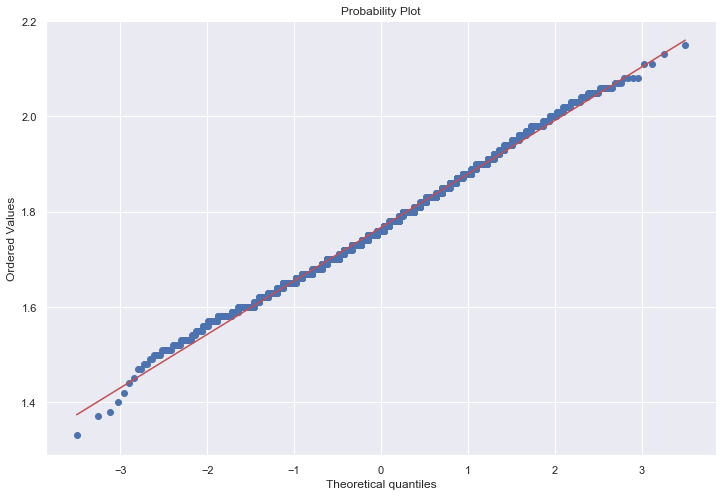

In [10]:
#Quantile-quantile plot em proporção
#Existe um desvio da reta normal nas extremidades
sct.probplot(var, dist="norm", plot=plt)

In [11]:
#mesmo utilizando outro teste estatístico, o resultado de
#rejeitar H0 se mantém
sct.jarque_bera(var)

(13.03363513594265, 0.001478366424594868)

## Reflexão questões 3 e 4

In [12]:
#H0 distribuição é normal
#Aplicando o teste de normalidade de D´Agostino-Pearson e analisando
#p-value, rejeitamos H0
var=get_sample(athletes, 'weight', n=3000)
sct.normaltest(var)

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

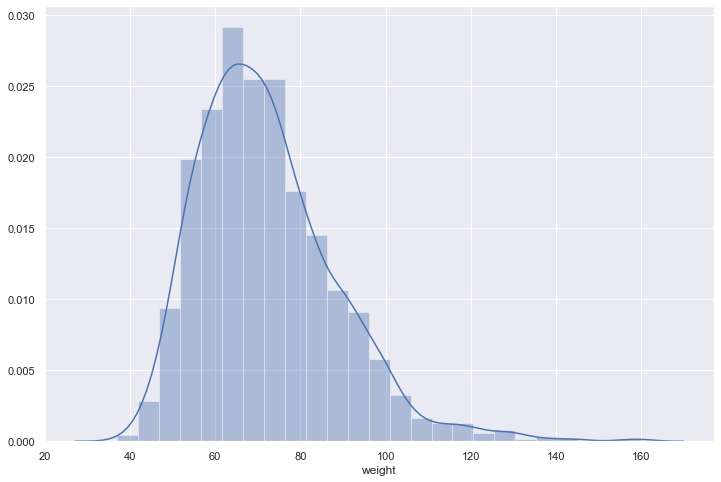

In [13]:
#a visualização mostra a curva em formato de sino mais para a esquerda 
#dando uma impressão mais clara de não se tratar de uma distribuição normal
sns.distplot(var, bins=25)

{'whiskers': [<matplotlib.lines.Line2D at 0x283559e0b88>,
 'caps': [<matplotlib.lines.Line2D at 0x283559e3b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x28356beb588>],
 'medians': [<matplotlib.lines.Line2D at 0x283559e9ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x283559e9c08>],
 'means': []}

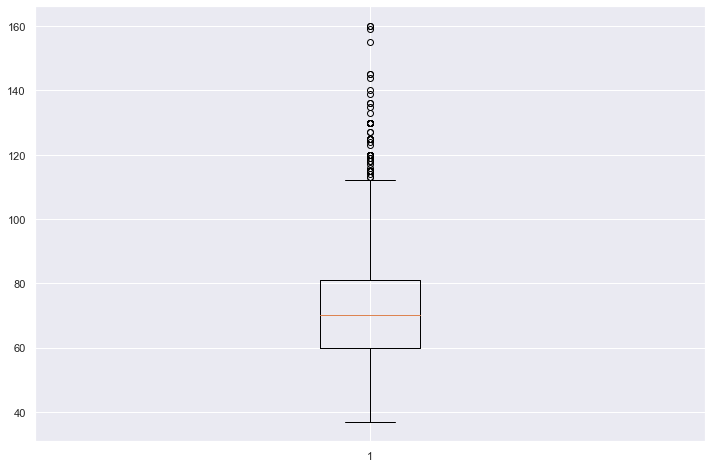

In [14]:
#Pela disposição dos dados, se a distribuição fosse normal, não haveriam tantos outliers
plt.boxplot(var)

### Transformação logaritmica

In [15]:
varlog = np.log(var)

In [16]:
varlog

2162     4.382027
3450     4.248495
6886     4.234107
3871     4.189655
6383     4.406719
           ...   
11255    4.143135
9790     4.110874
4127     4.828314
463      3.988984
6664     4.127134
Name: weight, Length: 3000, dtype: float64

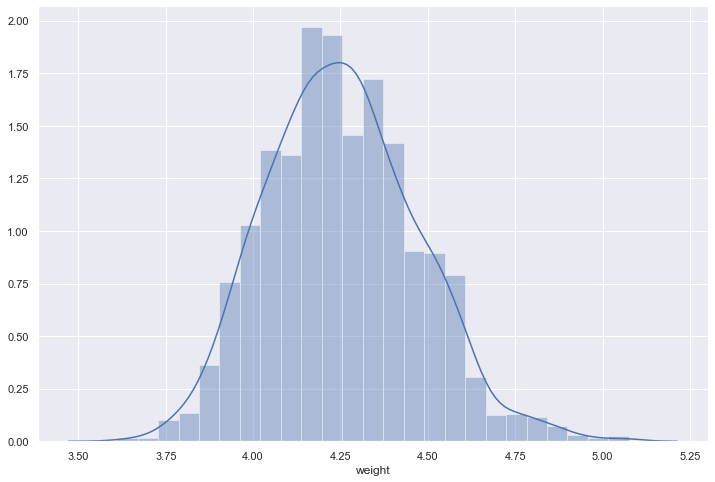

In [17]:
#A transformação logaritma reduz um pouco o efeito do viés mas não o suficiente
#para transformar a distribuição em normal
sns.distplot(varlog, bins=25)

In [18]:
sct.normaltest(varlog)

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

## Reflexão questões 5,6 e 7

In [19]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [20]:
athletes.nationality.value_counts()

USA    567
BRA    485
GER    441
AUS    431
FRA    410
      ... 
LBR      2
DMA      2
MTN      2
SWZ      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [21]:
bra = athletes.loc[athletes.nationality=='BRA', 'height']
usa = athletes.loc[athletes.nationality=='USA', 'height']
can = athletes.loc[athletes.nationality=='CAN', 'height']

In [22]:
#Consideramos que temos registros Nan nestes arrays
print('Tamanho de bra:', len(bra))
print('Tamanho de usa:', len(usa))
print('Tamanho de can:', len(can))

Tamanho de bra: 485
Tamanho de usa: 567
Tamanho de can: 321


In [23]:
usa.isna().any()

True

In [24]:
sct.ttest_ind(bra, usa, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-3.2232436467501855, pvalue=0.0013080041830140115)

In [30]:
#H0 as médias são estatisticamente iguais
#como p-value <0.05 rejeitamos H0
#não podemos afirmar que as médias são estatisticamente iguais
sct.ttest_ind(bra, usa, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-3.2232436467501855, pvalue=0.0013080041830140115)

In [26]:
#H0 as médias são estatisticamente iguais
#como p-value >0.05 falhamos em rejeitar H0
#não existe evidencias suficientes para dizer que as medias não são estatisticamente iguais
sct.ttest_ind(bra, can, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=0.6389304914365109, pvalue=0.5230827295440921)

In [29]:
sct.ttest_ind(usa, can, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=3.516987632488539, pvalue=0.0004660129347389851)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [6]:
def q1():
    var=get_sample(athletes, 'height', n=3000)
    return False if sct.shapiro(var)[1]<0.05 else True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
def q2():
    var=get_sample(athletes, 'height', n=3000)
    return False if sct.jarque_bera(var)[1]<0.05 else True

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [8]:
def q3():
    var=get_sample(athletes, 'weight', n=3000)
    return False if sct.normaltest(var)[1]<0.05 else True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [9]:
def q4():
    varlog = np.log(var)
    return False if sct.normaltest(varlog)[1]<0.05 else True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [10]:
def q5():
    bra = athletes.loc[athletes.nationality=='BRA', 'height']
    usa = athletes.loc[athletes.nationality=='USA', 'height']
    can = athletes.loc[athletes.nationality=='CAN', 'height']

    #H0 as medias são estatisticamente iguais
    return bool(sct.ttest_ind(bra, usa, equal_var=False, nan_policy='omit')[1]>0.05)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [11]:
def q6():
    bra = athletes.loc[athletes.nationality=='BRA', 'height']
    can = athletes.loc[athletes.nationality=='CAN', 'height']

    #H0 as medias são estatisticamente iguais
    return bool(sct.ttest_ind(bra, can, equal_var=False, nan_policy='omit')[1]>0.05)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [12]:
def q7():
    usa = athletes.loc[athletes.nationality=='USA', 'height']
    can = athletes.loc[athletes.nationality=='CAN', 'height']

    #H0 as medias são estatisticamente iguais
    return float(round(sct.ttest_ind(usa, can, equal_var=False, nan_policy='omit')[1],8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?